In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

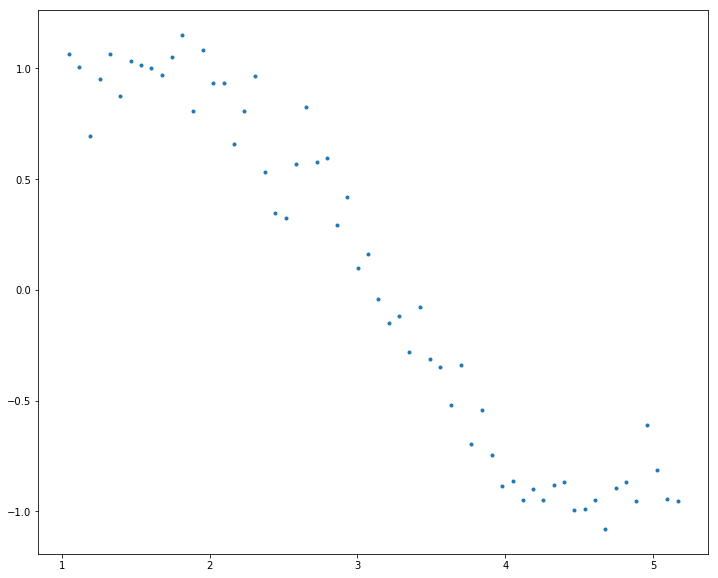

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
# Import Ridge regression from scikit-learn
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
        
    # Fit the model
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    # Check if a plot is to be made for the entered power
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend([ridgereg.coef_])
    return ret

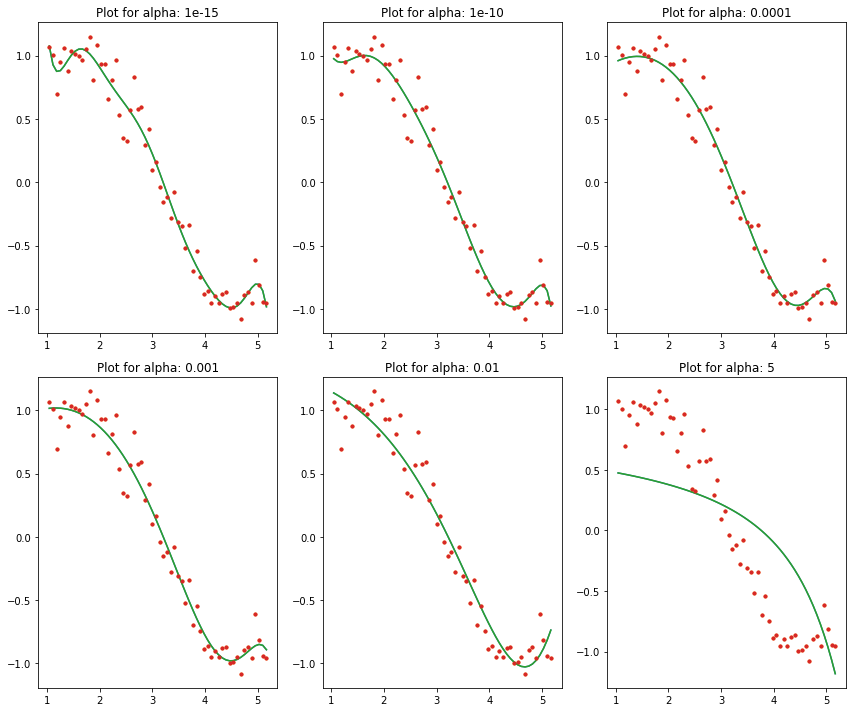

In [5]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    #coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
    coef_matrix_ridge.iloc[i,0:2] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot=models_to_plot)[0:2]
    coef_matrix_ridge.iloc[i,2:] = np.array(ridge_regression(data, predictors, alpha_ridge[i], models_to_plot=models_to_plot)[2:])

In [6]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.873106,94.3086,-298.286,378.345,-236.477,67.7631,-1.17314,-3.69304,0.304958,0.189058,-0.0214981,-0.00767798,0.00105963,0.000246367,-6.34577e-05,4.6091e-06,-9.00559e-08
alpha_1e-10,0.922601,11.1701,-28.9629,31.0694,-15.2353,2.89182,0.169364,-0.0910019,-0.0108383,0.00198378,0.00063697,2.40845e-05,-2.00113e-05,-4.2037e-06,2.19352e-07,2.2729e-07,-2.33741e-08
alpha_1e-08,0.949292,1.33999,-1.53065,1.74946,-0.680458,0.038843,0.0158179,0.00015918,-0.00035954,-5.37182e-05,-2.91013e-07,1.08091e-06,1.89389e-07,1.96191e-08,3.92864e-09,8.19001e-10,-4.62722e-10
alpha_0.0001,0.962018,0.56132,0.546549,-0.128142,-0.025713,-0.00282024,-0.000110299,4.0575e-05,1.52075e-05,3.65239e-06,7.36585e-07,1.30351e-07,1.9445e-08,1.93533e-09,-1.30259e-10,-1.54943e-10,-6.17707e-11
alpha_0.001,1.00178,0.817638,0.305147,-0.0866873,-0.0204755,-0.00283643,-0.000219199,1.81203e-05,1.2399e-05,3.42971e-06,7.28224e-07,1.29346e-07,1.86865e-08,1.70622e-09,-1.5108e-10,-1.40448e-10,-5.16034e-11
alpha_0.01,1.43579,1.29889,-0.0883959,-0.0515001,-0.010099,-0.00141244,-0.000131521,7.23082e-07,4.13617e-06,1.30478e-06,2.96417e-07,5.6157e-08,8.97185e-09,1.09406e-09,4.29249e-11,-3.14226e-11,-1.48705e-11
alpha_1,5.64874,0.968886,-0.139008,-0.019268,-0.00300434,-0.000465519,-6.97006e-05,-9.90064e-06,-1.29236e-06,-1.42846e-07,-9.33025e-09,1.30688e-09,7.8035e-10,2.40231e-10,6.15627e-11,1.44581e-11,3.22713e-12
alpha_5,13.8383,0.54826,-0.0588687,-0.00852167,-0.00141945,-0.000241004,-4.08318e-05,-6.87431e-06,-1.14898e-06,-1.90534e-07,-3.13146e-08,-5.09188e-09,-8.16953e-10,-1.28804e-10,-1.98296e-11,-2.95006e-12,-4.16233e-13
alpha_10,18.0248,0.400342,-0.0372364,-0.00552679,-0.000949634,-0.000167292,-2.95811e-05,-5.23032e-06,-9.24527e-07,-1.63445e-07,-2.89111e-08,-5.11838e-09,-9.07113e-10,-1.60954e-10,-2.85942e-11,-5.08624e-12,-9.05846e-13
alpha_20,22.7205,0.276703,-0.0224693,-0.00340492,-0.000599344,-0.000108458,-1.9744e-05,-3.60077e-06,-6.57576e-07,-1.2028e-07,-2.20428e-08,-4.04814e-09,-7.45085e-10,-1.37447e-10,-2.54123e-11,-4.70877e-12,-8.7438e-13


In [7]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64